In [1]:
import pandas as  pd
import numpy as np
import pandas as pd
import nltk
# import spacy
import pythainlp
from sklearn.model_selection import train_test_split
# import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix


In [2]:
df = pd.read_csv('E:\Thesis\data\dataset\\3class_3000_oversampling_joined.csv',index_col=0)
df

,Verification_Status,processed_Text,noun_count,Word_Count,entity_count,class,sum_bow
0,ข่าวปลอม,กรมพัฒนาธุรกิจการ ค้า อนุญาต ใบ ทะเบียน พาณิ...,12,17,3,2,16
1,ข่าวปลอม,"กรมการจัดหางาน ส่งเสริม ไทย เฉลี่ย 1,500...",4,19,9,2,8
2,ข่าวปลอม,ตลาด หลักทรัพย์แห่งประเทศไทย ทุน หา ค่า ข้าว...,8,22,7,2,11
3,ข่าวปลอม,ตลาดหลักทรัพย์ พอร์ต หุ้น ธนาคาร กำไร 48...,6,13,2,2,7
4,ข่าวปลอม,บริหาร ธ. ออมสินไลน์ เชิญชวน กู้ เงิน หลัก ...,7,18,2,2,13
...,...,...,...,...,...,...,...
8995,ข่าวบิดเบือน,นั่ง ตัว งอบ่อย เสี่ยง โรค ค่อมถาวร พฤติ...,10,26,0,1,14
8996,ข่าวบิดเบือน,โครงการ คลินิก ช่วยเหลือ หนี้ SAM ผ่อน ชำร...,8,23,0,1,11
8997,ข่าวบิดเบือน,กด ค้าง บีบ นวด บริเวณ แก้ม แรง ทำ ปากเบี้ยว,6,15,0,1,10
8998,ข่าวบิดเบือน,ประเทศไทย เตรียม กระทบ พายุ 3 ลูก คาด กระท...,6,22,2,1,9


In [3]:
class_names , _  = np.unique(df['Verification_Status'],return_inverse=True)
class_names
name = ['True_News','Suspicious_News','Fake_News']


In [4]:
df = df[['processed_Text','noun_count','Word_Count','entity_count','sum_bow','class']]
df

,processed_Text,noun_count,Word_Count,entity_count,sum_bow,class
0,กรมพัฒนาธุรกิจการ ค้า อนุญาต ใบ ทะเบียน พาณิ...,12,17,3,16,2
1,"กรมการจัดหางาน ส่งเสริม ไทย เฉลี่ย 1,500...",4,19,9,8,2
2,ตลาด หลักทรัพย์แห่งประเทศไทย ทุน หา ค่า ข้าว...,8,22,7,11,2
3,ตลาดหลักทรัพย์ พอร์ต หุ้น ธนาคาร กำไร 48...,6,13,2,7,2
4,บริหาร ธ. ออมสินไลน์ เชิญชวน กู้ เงิน หลัก ...,7,18,2,13,2
...,...,...,...,...,...,...
8995,นั่ง ตัว งอบ่อย เสี่ยง โรค ค่อมถาวร พฤติ...,10,26,0,14,1
8996,โครงการ คลินิก ช่วยเหลือ หนี้ SAM ผ่อน ชำร...,8,23,0,11,1
8997,กด ค้าง บีบ นวด บริเวณ แก้ม แรง ทำ ปากเบี้ยว,6,15,0,10,1
8998,ประเทศไทย เตรียม กระทบ พายุ 3 ลูก คาด กระท...,6,22,2,9,1


Word2Vec

In [ ]:
from gensim.models import Word2Vec , FastText
from gensim.models import KeyedVectors
docs = df['processed_Text'].apply(lambda x: x.split())  
fasttext_model = KeyedVectors.load_word2vec_format('gensim_fasttext_3000_vec300_e500_mc1.bin', binary=False)

In [ ]:

def get_word2vec_embedding(text, model, vector_size=300):
    
    vec = np.zeros((vector_size,))
    count = 0
    for word in text.split():
        if word in model:
            vec += model[word]
            count += 1
    # if word unavailable in vocabulary then calucate average of vector
    if count > 0:
        vec /= count
    return vec

# create vector each
X_vectors = np.array([get_word2vec_embedding(text, fasttext_model) for text in df['processed_Text']])


In [ ]:
X_vectors = X_vectors.reshape(X_vectors.shape[0], 1, X_vectors.shape[1])
print(X_vectors.shape)  


(9000, 1, 300)


In [ ]:
# combine word2vec and numeric vector
numeric_features_3D = df[['noun_count', 'Word_Count', 'entity_count', 'sum_bow']].values.reshape(-1, 1, 4) # LSTM need 3D vector
X_combined = np.concatenate([X_vectors, numeric_features_3D], axis=-1)
X_combined.shape

(9000, 1, 304)

#### labelEncoder

In [15]:
y = df['class']
y

0       2
1       2
2       2
3       2
4       2
       ..
8995    1
8996    1
8997    1
8998    1
8999    1
Name: class, Length: 9000, dtype: int64

In [ ]:
y_onehot = to_categorical(y, num_classes=3)
print("One-Hot encoded y_train:", y_onehot[:10])
print("Classes in y_train_onehot:", np.argmax(y_onehot, axis=1))

One-Hot encoded y_train: [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
Classes in y_train_onehot: [2 2 2 ... 1 1 1]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_onehot, test_size=0.2, random_state=42)


In [18]:
X_train.shape , y_train.shape


((7200, 1, 304), (7200, 3))

In [19]:
from tensorflow.keras.models import Sequential
import random
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization, Embedding , RNN, GRU , SimpleRNNCell, Bidirectional ,Attention , Flatten
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import regularizers ,Input, Model

import numpy as np
import matplotlib.pyplot as plt

Epoch 1/200
113/113 [==============================] - 14s 40ms/step - loss: 18.9242 - accuracy: 0.3388 - val_loss: 17.9217 - val_accuracy: 0.3411 - lr: 1.0000e-04
Epoch 2/200
113/113 [==============================] - 2s 21ms/step - loss: 17.2353 - accuracy: 0.3389 - val_loss: 16.4181 - val_accuracy: 0.3411 - lr: 1.0000e-04
Epoch 3/200
113/113 [==============================] - 2s 21ms/step - loss: 15.8263 - accuracy: 0.3378 - val_loss: 15.1337 - val_accuracy: 0.3411 - lr: 1.0000e-04
Epoch 4/200
113/113 [==============================] - 2s 21ms/step - loss: 14.6087 - accuracy: 0.3425 - val_loss: 14.0161 - val_accuracy: 0.3678 - lr: 1.0000e-04
Epoch 5/200
113/113 [==============================] - 2s 21ms/step - loss: 13.5603 - accuracy: 0.3356 - val_loss: 13.0327 - val_accuracy: 0.3750 - lr: 1.0000e-04
Epoch 6/200
113/113 [==============================] - 2s 21ms/step - loss: 12.6208 - accuracy: 0.3489 - val_loss: 12.1568 - val_accuracy: 0.3928 - lr: 1.0000e-04
Epoch 7/200
113/113 [

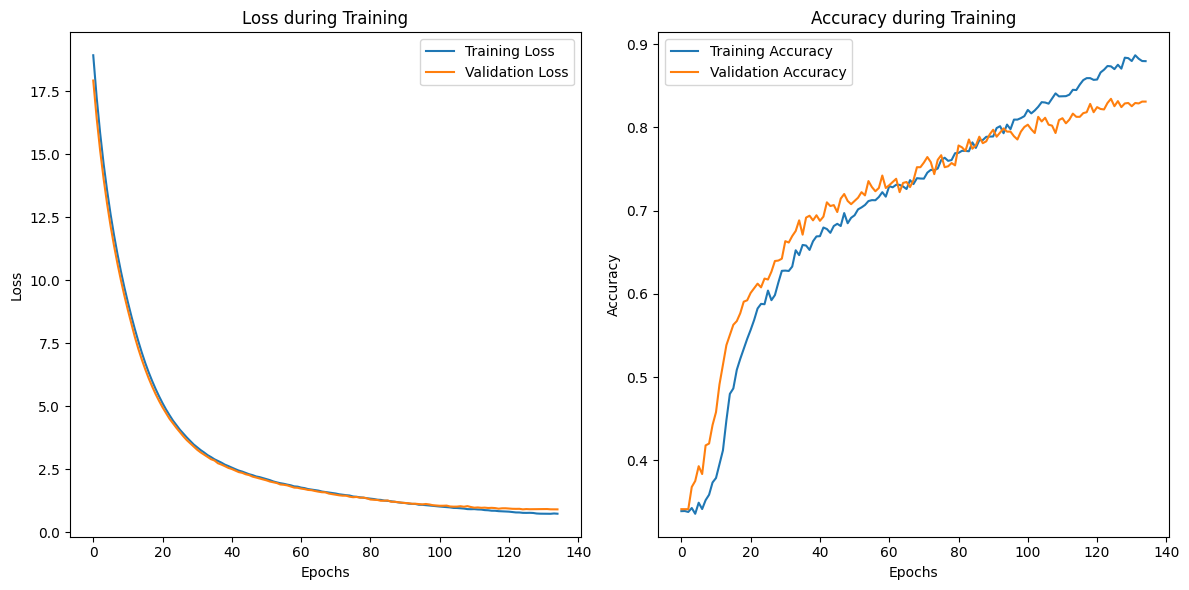

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, BatchNormalization, Flatten, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Input Layer
input_layer = Input(shape=(1, 304))

# BiLSTM Layers
x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.3, kernel_regularizer=regularizers.l2(0.001)))(input_layer)
x = BatchNormalization()(x)

x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, kernel_regularizer=regularizers.l2(0.001)))(x)
x = BatchNormalization()(x)

x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, kernel_regularizer=regularizers.l2(0.02)))(x)
x = BatchNormalization()(x)

x = Bidirectional(LSTM(32, return_sequences=False, dropout=0.2, kernel_regularizer=regularizers.l2(0.02)))(x)
x = BatchNormalization()(x)

# Attention Mechanism
query = Dense(128)(x)
key = Dense(128)(x)
value = Dense(128)(x)
attention_output = Attention()([query, key, value])

# Flatten เพื่อปรับ Shape ให้เป็น (None, features)
x = Flatten()(attention_output)

# Fully Connected Layers
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.2)(x)

# Output Layer
output_layer = Dense(3, activation='softmax')(x)

# Define Model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# ค้นหา Best Validation Accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
best_acc = history.history['val_accuracy'][best_epoch]
best_loss = history.history['val_loss'][best_epoch]

print(f"Best Validation Loss: {best_loss:.4f}")
print(f"Best Validation Accuracy: {best_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

57/57 [==============================] - 2s 8ms/step


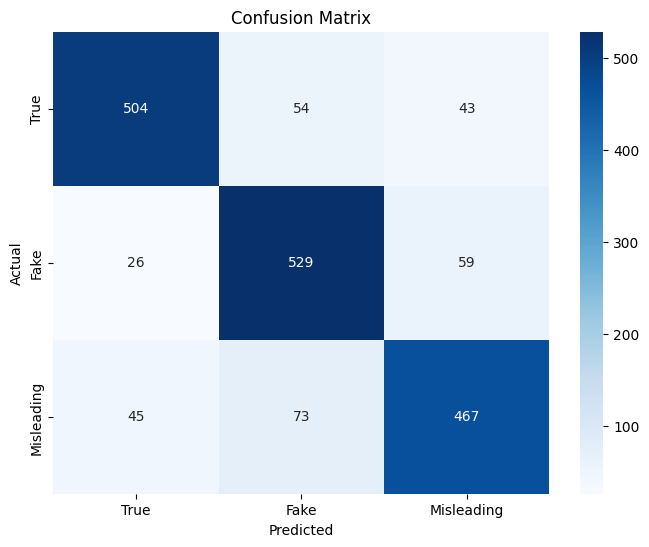

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



y_pred_classes = np.argmax(model.predict(X_test), axis=-1)  # class labels from one-hot encoding
y_test_classes = np.argmax(y_test, axis=-1)

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# display comfusion matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'Fake', 'Misleading'], yticklabels=['True', 'Fake', 'Misleading'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
